# **Etude de la loi Vasicek**

In [1]:
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Fonction de densité de la loi $Vasicek(p,\rho)$ :
$$f_L(x,p,\rho) = \sqrt{\frac{1-\rho}{\rho}}\ exp[\frac{-1}{2\rho} (\sqrt{1-\rho}\mathcal{N}^{-1}(x) - \mathcal{N}^{-1}(p))^2 + \frac{1}{2} \left(\mathcal{N}^{-1}(x) \right)^2]$$

In [3]:
def f_l(x,p,rho):  
    return (np.sqrt((1-rho)/rho)) * np.exp(  (-1/(2*rho)) * ( np.sqrt(1-rho) * norm.ppf(x) - norm.ppf(p) )**2 + 0.5*(norm.ppf(x))**2  )

C:\Users\jason\AppData\Local\Temp\ipykernel_28524\3194868590.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (np.sqrt((1-rho)/rho)) * np.exp(  (-1/(2*rho)) * ( np.sqrt(1-rho) * norm.ppf(x) - norm.ppf(p) )**2 + 0.5*(norm.ppf(x))**2  )


Text(0.5, 1.0, 'densité Vasicek(0.3,0.2)')

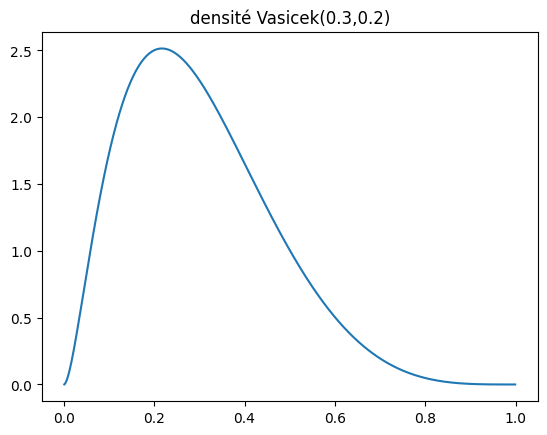

In [50]:
x1 = np.linspace(0,1,1000)
y1 = [f_l(i,0.3,0.2) for i in x1]

plt.plot(x1,y1)
plt.title("densité Vasicek(0.3,0.2)")

C:\Users\jason\AppData\Local\Temp\ipykernel_28524\3194868590.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (np.sqrt((1-rho)/rho)) * np.exp(  (-1/(2*rho)) * ( np.sqrt(1-rho) * norm.ppf(x) - norm.ppf(p) )**2 + 0.5*(norm.ppf(x))**2  )


Text(0.5, 1.0, 'densité Vasicek(0.3,0.5)')

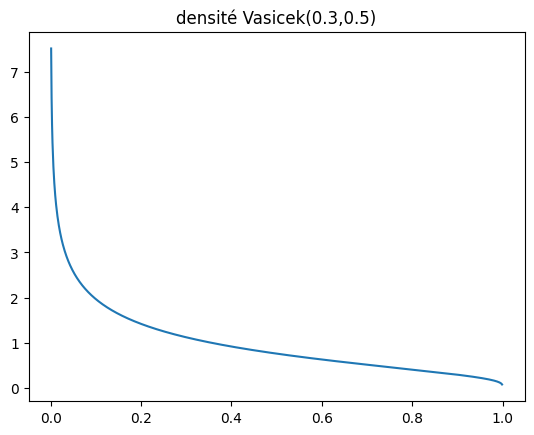

In [51]:
x3 = np.linspace(0,1,1000)
y3 = [f_l(i,0.3,0.5) for i in x2]

plt.plot(x3,y3)
plt.title("densité Vasicek(0.3,0.5)")

C:\Users\jason\AppData\Local\Temp\ipykernel_28524\3194868590.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (np.sqrt((1-rho)/rho)) * np.exp(  (-1/(2*rho)) * ( np.sqrt(1-rho) * norm.ppf(x) - norm.ppf(p) )**2 + 0.5*(norm.ppf(x))**2  )


Text(0.5, 1.0, 'densité Vasicek(0.3,0.7)')

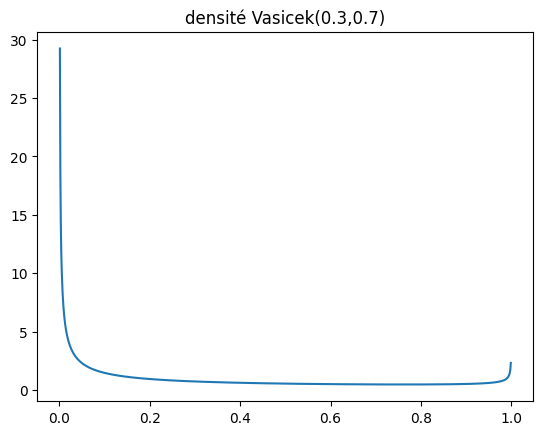

In [52]:
x2 = np.linspace(0,1,1000)
y2 = [f_l(i,0.3,0.7) for i in x2]

plt.plot(x2,y2)
plt.title("densité Vasicek(0.3,0.7)")

## **Simulation de perte** : à partir de la loi de Vasicek

Nous allons générer les rendements d'un pool d'actif composé de 500 unités en utilisant la structure de corrélation gaussienne suivante :

$$W_{i,1} = \sqrt{\rho}f + \sqrt{1-\rho}\epsilon_{i}$$ 

Avec

$$ f : systemic\ factor\ \overset{d}{=} \mathcal{N}(0,1) \\
        \epsilon_i : idiosyncratic/specific\ factor\ \overset{d}{=} \mathcal{N}(0,1) \\
        f \perp \epsilon_1 \perp \dots \perp \epsilon_n$$

Puis nous allons créer la fonction $L(p,\rho) = \frac{1}{n} \displaystyle \sum_{i=1}^n L_i$

In [105]:
def Li(wi,s):
    ''' Renvoie si le loan i est en défaut, cad si w est en dessous du seuil de défaut

    Parameters
    ----------
    wi : float
        rendement
    '''
    return int(wi < s)

In [197]:
def L(p, rho):
    ''' Calcul la proportion de défaut (suit la loi Vasicek(p,rho) en théorie)

    Parameters
    ----------
    p : float [0,1]
        probabilité de défaut du loan i à priori
    rho : float [0,1]
        coefficient de corrélation
    '''
    s = norm.ppf(p) # Il s'agit du seuil de défaut, définit comme étant l'inverse de la fonction de répartition gaussienne

    # On génère le facteur systémique f
    f = np.random.normal(0,1)

    # On génère les facteurs specific epsilon_i
    eps = np.random.randn(500) # Il faut qu'il y ait suffisamment d'actif pour obtenir la loi de Vasicek asymptotique (500 suffira)

    # On construit les rendements de chacun des actifs
    w = [np.sqrt(rho)* f + np.sqrt(1-rho)*i for i in eps]

    return np.sum([Li(wi,s) for wi in w])/len(w)

In [198]:
L(0.5, 0.9)

0.77

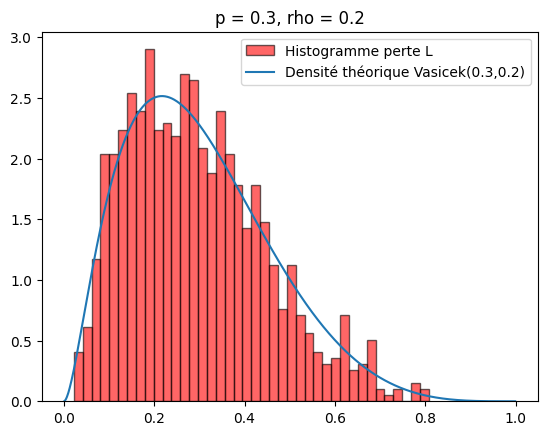

In [199]:
x = np.linspace(0,1,2000)
L_list = [L(0.3, 0.2) for i in x1]

plt.hist(L_list, bins=40, density=True, alpha=0.6, color='red', edgecolor='black', label='Histogramme perte L')
plt.plot(x1,y1,label='Densité théorique Vasicek(0.3,0.2)')
plt.title("p = 0.3, rho = 0.2")
plt.legend()

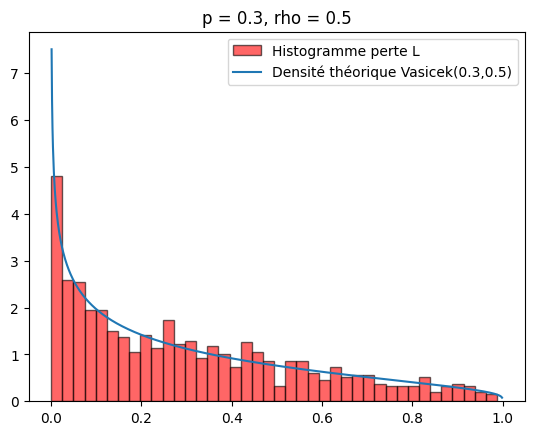

In [200]:
x = np.linspace(0,1,2000)
L_list = [L(0.3, 0.5) for i in x1]

plt.hist(L_list, bins=40, density=True, alpha=0.6, color='red', edgecolor='black', label='Histogramme perte L')
plt.plot(x3,y3, label='Densité théorique Vasicek(0.3,0.5)')
plt.title("p = 0.3, rho = 0.5")
plt.legend()

### **Estimation des paramètres**

**Rappel** :

$$\hat{\rho} = \frac{\hat{\sigma}^2}{1+ \hat{\sigma}^2}\ \ \ avec \ \ \ \hat{\mu} =\frac{1}{n} \displaystyle \sum_{i=1}^n \mathcal{N}^{-1}(L_i)$$

$$\hat{p} = \mathcal{N}\left(  \frac{\hat{\mu}}{\sqrt{1 + \hat{\sigma}^2}} \right) \ \ \ avec \ \ \ \hat{\sigma^2} = \frac{1}{n} \displaystyle \sum_{i=1}^n \mathcal{N}^{-1}(L_i)^2 - \hat{\mu}^2$$

In [203]:
p_th = 0.3 # On initialise p
rho_th = 0.2 # On initialise rho

L_simulate = [L(p_th, rho_th) for i in range (3000)]
L_simulate = [x for x in L_simulate if x != 0 and x != 1] # On retire les L=0 ou L=1 car l la fonction de répartition inverse de la gaussienne est défini sur ]0,1[
print(len(L_simulate))

mu_hat = np.mean([norm.ppf(li) for li in L_simulate])
sigma_hat = np.mean([norm.ppf(li)**2 for li in L_simulate]) - mu_hat**2

rho_hat = sigma_hat/(1+sigma_hat)
p_hat = norm.cdf(mu_hat/(np.sqrt(1+sigma_hat)))

print("Estimation de p :", p_hat, "Valeur théorique de p :", p_th)
print("Estimation de rho :", rho_hat, "Valeur théorique de p :", rho_th)

3000
Estimation de p : 0.3031475974788308 Valeur théorique de p : 0.3
Estimation de rho : 0.20008960228145461 Valeur théorique de p : 0.2
